### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Bike_DataSet's csv file


In [3]:
df = pd.read_csv(r'Bike_DataSet.csv')


In [4]:
df

,Company,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State
0,Honda,Honda XBlade,2018,54000,Yes,Kolkata,West Bengal
1,Honda,Honda SP125,2023,88000,Yes,Indore,Madhya Pradesh
2,Jawa,Jawa 42 Bobber Black Mirror,2023,210000,Yes,Ghaziabad,Uttar Pradesh
3,Suzuki,Suzuki V-Strom SX,2023,178000,Yes,Ahmedabad,Gujarat
4,Hero,Hero Xtreme 200R,2019,50000,Yes,Gurgaon,Haryana
...,...,...,...,...,...,...,...
710,Yezdi,Yezdi Roadster Dark,2022,150000,Yes,Guwahati,Assam
711,Yamaha,Yamaha YZF R15 V3,2019,108000,Yes,Madurai,Tamil Nadu
712,Yamaha,Yamaha FZS 25 BS6,2021,115000,Yes,"Dadar, Mumbai",Maharashtra
713,TVS,TVS Apache RTR 160 4V 2024,2024,120000,Yes,"Narkatiaganj, West Champaran",Bihar


### Check the shape of the DataFrame

- The DataFrame is having 715 rows and 7 columns.

In [5]:
df.shape

(715, 7)

# Checking information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company                    715 non-null    object
 1   Bike Model                 715 non-null    object
 2   Model Year                 715 non-null    int64 
 3   Price (Rs)                 715 non-null    int64 
 4   Finance_Available(Yes/No)  715 non-null    object
 5   City                       715 non-null    object
 6   State                      715 non-null    object
dtypes: int64(2), object(5)
memory usage: 39.2+ KB


In [7]:
# Change the datatype of price (Rs) column to float.
df['Price (Rs)'] = df['Price (Rs)'].astype(float)

In [8]:
# Rechecking the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    715 non-null    object 
 1   Bike Model                 715 non-null    object 
 2   Model Year                 715 non-null    int64  
 3   Price (Rs)                 715 non-null    float64
 4   Finance_Available(Yes/No)  715 non-null    object 
 5   City                       715 non-null    object 
 6   State                      715 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 39.2+ KB


### Observation:-
#### - The Data has total 715 entries and 7 columns.
#### - It includes 1int64, 1float64, and 5object data types.

# Checking the Stastical Description.



In [9]:
# For Numerical columns
df.describe()

,Model Year,Price (Rs)
count,715.000000,715.000000
mean,2019.920280,112431.565035
std,3.897219,84408.287857
min,2005.000000,6000.000000
25%,2018.000000,52000.000000
50%,2021.000000,90000.000000
75%,2023.000000,153500.000000
max,2025.000000,880000.000000


In [10]:
# For Object columns
df.describe(include = 'object')

,Company,Bike Model,Finance_Available(Yes/No),City,State
count,715,715,715,715,715
unique,36,379,2,321,27
top,Royal Enfield,Royal Enfield Hunter 350 Metro,Yes,Pune,Maharashtra
freq,119,13,713,33,143


# Checking for duplicate

In [11]:
df.duplicated().sum()

0

### Observation:-
#### - There is no duplicate values in the data

# Checking the null values.

In [12]:
df.isna().sum()

Company                      0
Bike Model                   0
Model Year                   0
Price (Rs)                   0
Finance_Available(Yes/No)    0
City                         0
State                        0
dtype: int64

### Observation:- 
#### There is no null value present in the data set.

# Checking for number of unique values in the data.

In [13]:
df.nunique()

Company                       36
Bike Model                   379
Model Year                    21
Price (Rs)                   146
Finance_Available(Yes/No)      2
City                         321
State                         27
dtype: int64

### Observation:- 
#### The dataset includes unique values like 
- 36 companies, 
- 379 bike models, 
- 21 production years,
- 146 unique prices,
- 2 finance options,
- 321 cities,
- and 27 states

# Checking Correlation for numerical columns

In [14]:
df.corr(numeric_only=True)

,Model Year,Price (Rs)
Model Year,1.000000,0.459528
Price (Rs),0.459528,1.000000


### Observation:-
#### - There is a moderate positive correlation (0.46) between year and price.
#### - This means newer bikes generally sell for higher prices in the second-hand market

# Cleaning the City Column

In [15]:
# Extract only the part after comma
df['City'] = df['City'].str.replace(r'^.*,\s*', '', regex=True)
df['City']

0             Kolkata
1              Indore
2           Ghaziabad
3           Ahmedabad
4             Gurgaon
            ...      
710          Guwahati
711           Madurai
712            Mumbai
713    West Champaran
714            Rewari
Name: City, Length: 715, dtype: object

# Data Visualization:-
- Data visualization means showing information using pictures, charts, or graphs instead of only numbers or text.
- It helps people quickly understand patterns, trends, and comparisons in data.

# Univariate Analysis:-
- Univariate analysis means studying one variable (one column of data) at a time, to understand its patterns and summarize it.
- It helps us see how the values of that single variable are spread, how often they occur, and what is common or uncommon.

# numerical columns.

In [16]:
num_df = df.select_dtypes(include = 'number')

In [17]:
num_df.columns

Index(['Model Year', 'Price (Rs)'], dtype='object')

## Price



Price (Rs) 
 min         6000.000000
max       880000.000000
skew           2.623934
std        84408.287857
mean      112431.565035
median     90000.000000
Name: Price (Rs), dtype: float64
**************************************************


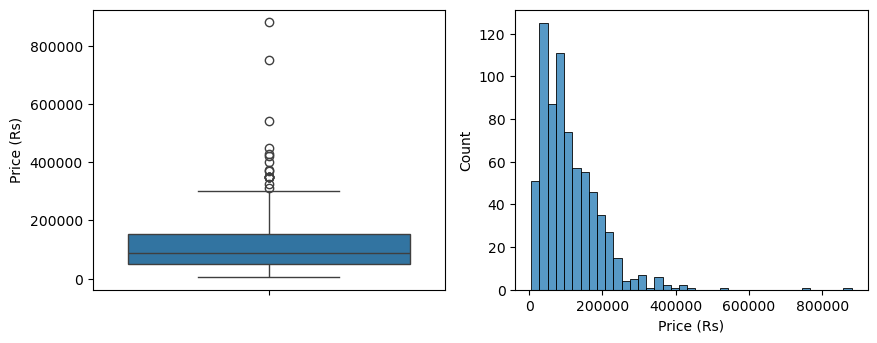

In [18]:
for i in num_df.columns[1:]:
    print(i,"\n",num_df[i].agg(['min','max','skew','std', 'mean','median']))
    print("*"*50)
   
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    sns.boxplot(num_df[i])
    plt.subplot(2,2,2)
    sns.histplot(num_df[i])
    plt.savefig("Price.png")
    plt.show()

### Observation:- 
#### Bike price's can be different, because some Bike's are more expensive according to there Comapny.

### Observation:- 
#### So it not making any sence to detect outliers of this Two columns.

## Year

In [19]:
year = df['Model Year'].value_counts()

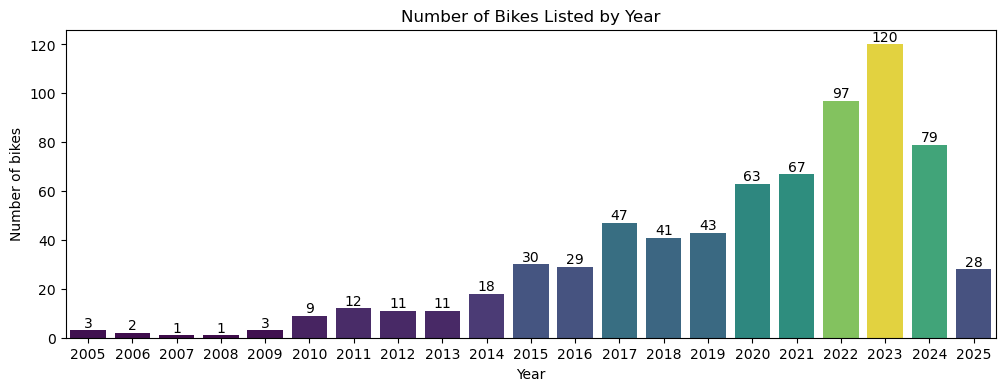

In [20]:
plt.figure(figsize =(12,4))
ax = sns.barplot(x = year.index, y = year.values, hue = year, palette='viridis',legend = False)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Year")
plt.ylabel("Number of bikes")
plt.title('Number of Bikes Listed by Year')
plt.savefig("Number of Bikes Listed by Year.png")
plt.show()

### Observation:-
- The number of bikes listed increased steadily from 2005 to 2015, then surged sharply from 2017 onward.
- 2023 had the highest listings at 120, indicating peak market activity or inventory.
- The listings slowed down in 2024 and 2025, possibly due to market changes or incomplete recent data.
- Overall, the data shows strong growth in bike listings over the last decade, reflecting rising demand and market interest.

# Categorical columns

In [21]:
cat_df = df.select_dtypes(include = 'object')

cat_df.columns

Index(['Company', 'Bike Model', 'Finance_Available(Yes/No)', 'City', 'State'], dtype='object')

## Company

## Which are the Top 10 Companies by Number of Bikes Listed?

In [22]:
com = df['Company'].value_counts().head(10)

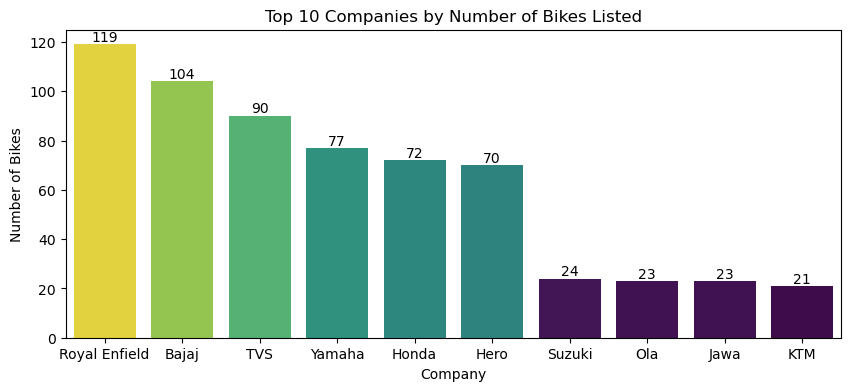

In [23]:
plt.figure(figsize = (10,4))
ax = sns.barplot(x = com.index, y = com.values, hue = com,palette='viridis', legend = False)

for i in ax.containers:
    ax.bar_label(i)

plt.title("Top 10 Companies by Number of Bikes Listed")
plt.xlabel("Company")
plt.ylabel("Number of Bikes")
plt.savefig("Top 10 Companies by Number of Bikes Listed.png", dpi=400, bbox_inches="tight")
plt.show()

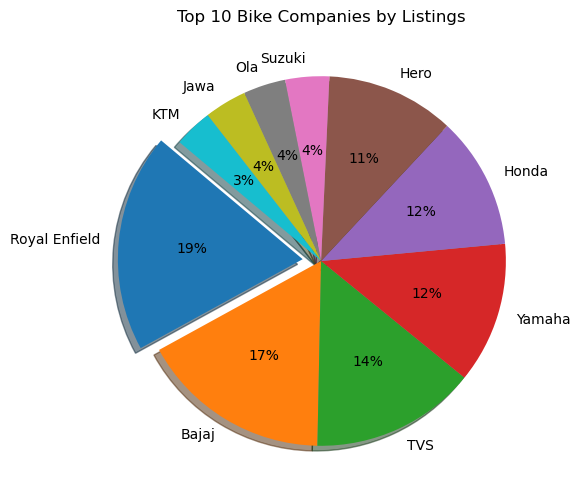

In [24]:
plt.figure(figsize=(6,6))
plt.pie(com.values, labels=com.index, autopct='%1.f%%',startangle=140, shadow=True,explode = [0.1,0,0,0,0,0,0,0,0,0,])
plt.title("Top 10 Bike Companies by Listings")
plt.savefig("Top 10 Companies by Number of Bikes Listed1.png", dpi=400, bbox_inches="tight")
plt.show()

### Observation:- 
- Royal Enfield leads with 123 listings, making up the largest market share among bike brands shown.
- Bajaj and TVS follow, with 104 and 91 bikes listed, highlighting their strong presence in the used bike market.
- Brands like Suzuki, Ola, Jawa, and KTM have significantly fewer listings, each below 30, suggesting lower availability or demand.
- The pie chart visually confirms Royal Enfield's dominance, occupying 19% of total listings, with Bajaj and TVS at 16% and 14%, respectively, and the rest split among other brands.

## States

##  Which states have the highest number of bikes listed?

In [25]:
state = df['State'].value_counts()

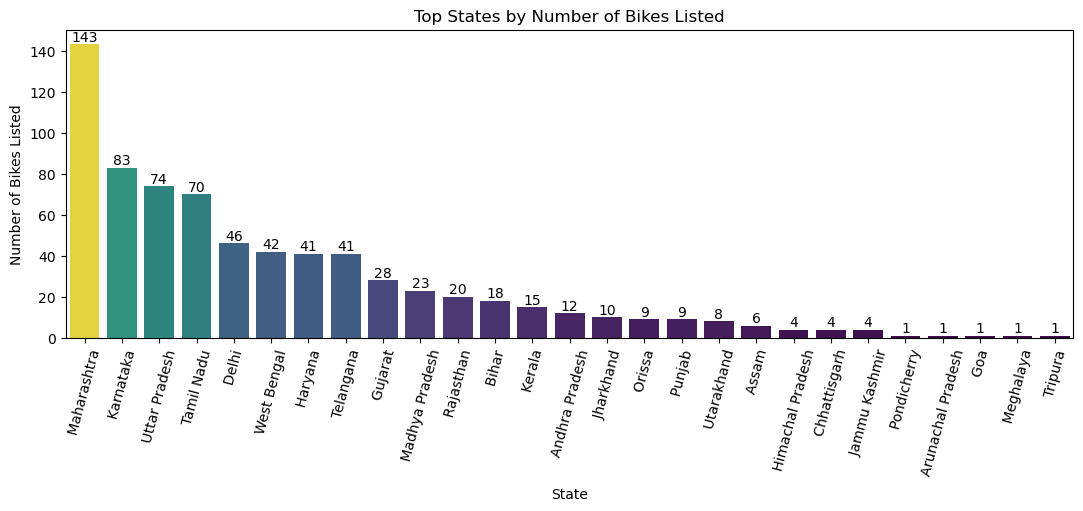

In [26]:
plt.figure(figsize = (13,4))
ax = sns.barplot(x = state.index, y = state.values,hue = state, palette='viridis', legend = False)

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 75)
plt.xlabel("State")
plt.ylabel("Number of Bikes Listed")
plt.title("Top States by Number of Bikes Listed")
plt.savefig("Top States by Number of Bikes Listed.png", dpi=400, bbox_inches="tight")
plt.show()

### Observation:-
- State Maharashtra has the highest number of bikes for sale.
- State's like Pondicherry, Arunachal Pradesh, Goa, Meghalaya, and Tripura has lowest number of bikes for sale.

## Bike Model

## Which bike model is most selled.

In [27]:
model = df['Bike Model'].value_counts().head(10)

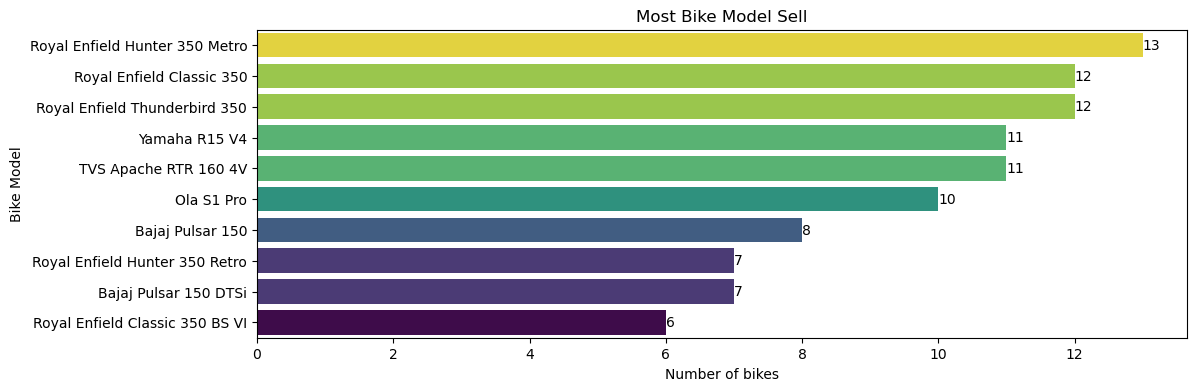

In [28]:
plt.figure(figsize =(12,4))
ax = sns.barplot(y = model.index, x = model.values, hue = model, palette='viridis',legend = False)

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Bike Model")
plt.xlabel("Number of bikes")
plt.title('Most Bike Model Sell')
plt.savefig("Most_Bike_Model_sell.png", dpi=400, bbox_inches="tight")
plt.show()

### Observation:-
- The most popular second-hand bikes are from Royal Enfield, with models like Hunter 350 Metro, Classic 350, and Thunderbird 350 leading sales.
- Other popular used bikes include Yamaha R15 V4, TVS Apache RTR 160, and Ola S1 Pro.
- Royal Enfield’s strong resale presence highlights its brand loyalty and demand in the used bike market

## How many bike models are available for sale from different companies?

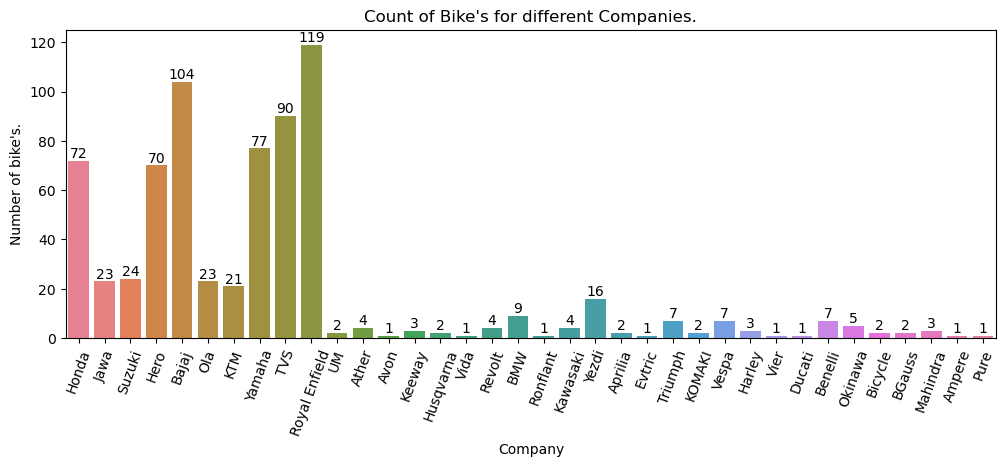

In [29]:
plt.figure(figsize= (12,4))
ax = sns.countplot(data = df, x = 'Company', hue = 'Company')

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Number of bike's.")
plt.title("Count of Bike's for different Companies.")
plt.savefig("Count of Bike's for different Companies.png", dpi=300, bbox_inches="tight")
plt.xticks(rotation = 70)
plt.show()

### Observation:- 
- Bikes of Royal Enfield and Bajaj Company are most seled.

## Finance Available(Yes/No)

## How many bikes are available with Finance Option?

In [30]:
finance = df['Finance_Available(Yes/No)'].value_counts()

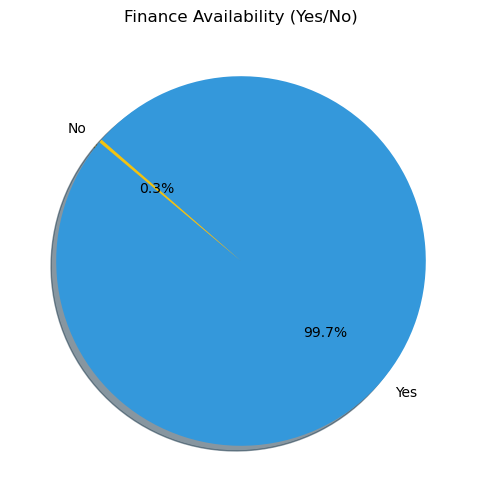

In [31]:
plt.figure(figsize=(6,6))
plt.pie(finance.values, labels=finance.index, autopct='%1.1f%%',startangle=140, shadow=True, colors=["#3498db", "#f1c40f"])
plt.title("Finance Availability (Yes/No)")
plt.show()


In [32]:
df.loc[df["Finance_Available(Yes/No)"] == "No"]

,Company,Bike Model,Model Year,Price (Rs),Finance_Available(Yes/No),City,State
543,Bicycle,Bicycle EMotorad,2024,20000.0,No,Baleswar,Orissa
693,Bicycle,Bicycle Gsports Triton mx,2025,24000.0,No,Bangalore,Karnataka


### Observation:-
- 99.7% of bikes are available with finance; only 0.3% are not available with finance option.

# **Bivariate Analysis:-**
- Bivariate analysis means studying the relationship between two variables or columns at the same time.
- It helps us see how one variable changes when the other changes.

## Distribution of bike prices over the Year? 

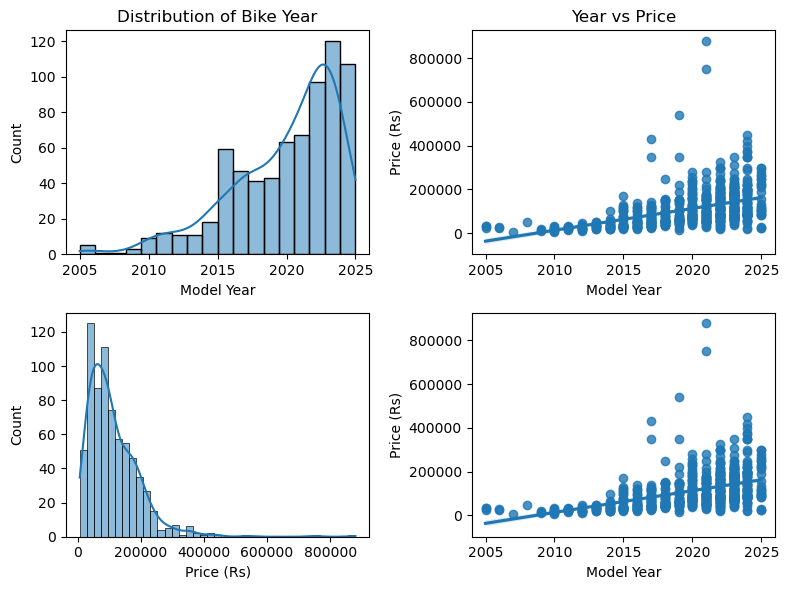

In [33]:
plt.figure(figsize=(8,6))

# Plot 1: Histogram of Year
plt.subplot(2,2,1)
sns.histplot(df['Model Year'], kde=True)
plt.title("Distribution of Bike Year")

# Plot 2: Scatterplot Year vs Price
plt.subplot(2,2,2)
sns.regplot(x=df['Model Year'], y=df['Price (Rs)'])
plt.title("Year vs Price")

# Plot 3: Histogram of Price
plt.subplot(2,2,3)
sns.histplot(df['Price (Rs)'], kde=True)


# Plot 4: Scatterplot Index vs Price
plt.subplot(2,2,4)
sns.regplot(x=df['Model Year'], y=df['Price (Rs)'])


plt.savefig("Price Distribution by Year.png", dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Observation:-
- Most second-hand bikes are priced below ₹2,00,000.
- Only a small number of bikes are sold above ₹3,00,000
- Most bikes are from recent years, with a sharp rise in new models after 2015.
- Newer bikes usually cost more, especially after 2020.
- Most bikes are priced affordably, while only a few have very high prices.
- Expensive bikes are rare compared to the large number of cheaper options.

## How did the average bike price change over the years?

C:\Users\nikhi\AppData\Local\Temp\ipykernel_33276\3609160237.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df['Model Year'], y=df['Price (Rs)'], width=0.5, hue =df["Model Year"], palette = "viridis", ci = None)


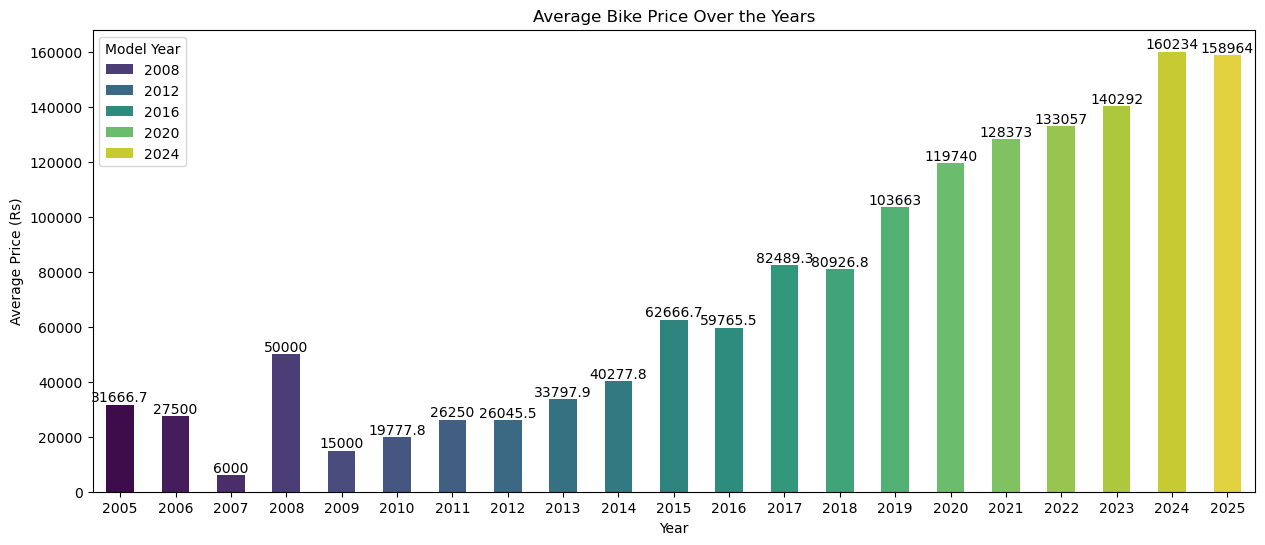

In [34]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Model Year'], y=df['Price (Rs)'], width=0.5, hue =df["Model Year"], palette = "viridis", ci = None)

for i in ax.containers:
    ax.bar_label(i)

plt.title("Average Bike Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price (Rs)")
plt.savefig("Average Bike Price Over_the_Years.png", dpi=300, bbox_inches="tight")

plt.show()

In [35]:
df["Model Year"] = df["Model Year"].astype(int)

In [36]:
avg = df.groupby("Model Year")["Price (Rs)"].mean()

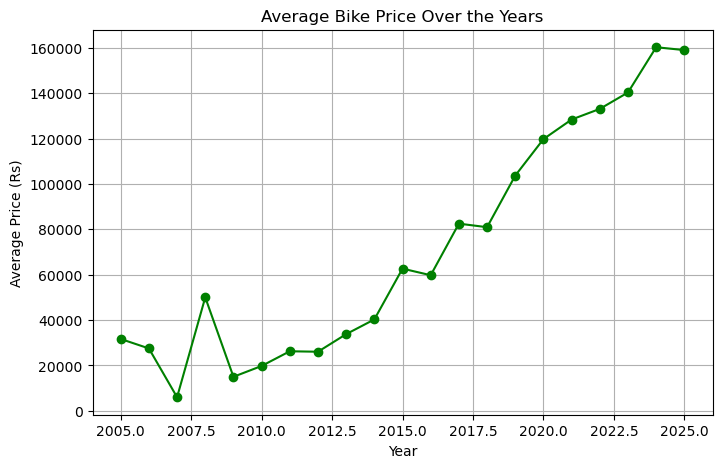

In [37]:
plt.figure(figsize=(8,5))
avg.plot(kind="line", marker="o", color="green")
plt.title("Average Bike Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price (Rs)")
plt.grid(True)
plt.savefig("Average Bike Price Over the Years.png")
plt.show()


### Observation:-
- The rising prices indicate more people are selling and buying used bikes.
- Average bike prices have increased sharply since 2015, reaching over ₹160,000 by 2025.
- This upward trend reflects growing demand, inflation, and the popularity of premium bike models in the second-hand market
- Growing demand in the resale market reflects affordability and preference for pre-owned bikes.

## Which are the top 10 most expensive bike's?

In [38]:
top_10_bikes = df.sort_values(by="Price (Rs)", ascending=False).head(10)

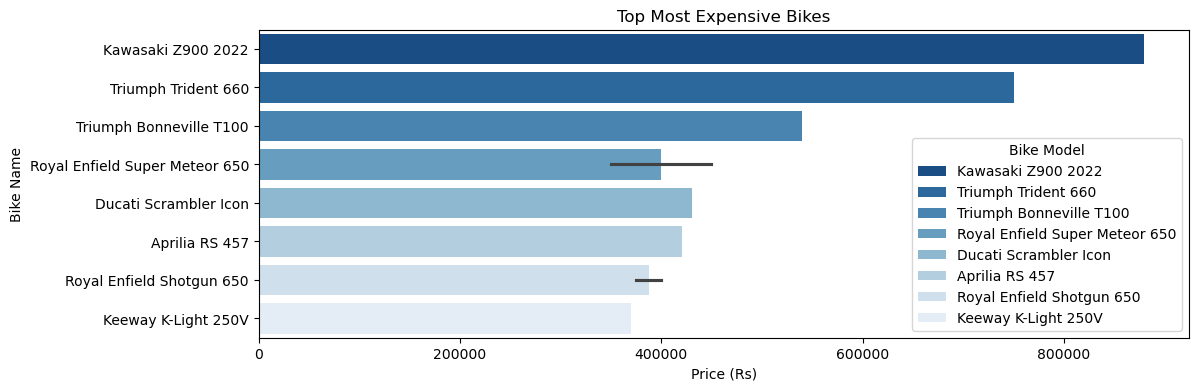

In [40]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_10_bikes, x="Price (Rs)", y="Bike Model", hue = 'Bike Model', palette="Blues_r", legend = True)
plt.xlabel("Price (Rs)")
plt.ylabel("Bike Name")
plt.title("Top Most Expensive Bikes")
plt.savefig("Top Most Expensive Bikes.png", dpi=300, bbox_inches="tight")
plt.show()

### Observation:-
- Kawasaki and Triumph dominate the top tier of bike prices, with a sharp price gap above competitors, while Royal Enfield and Ducati lead a competitive mid-range.

## Which are the top 10 most less expensive bike's?

In [41]:
top_10_bikes = df.sort_values(by="Price (Rs)", ascending=True).head(10)

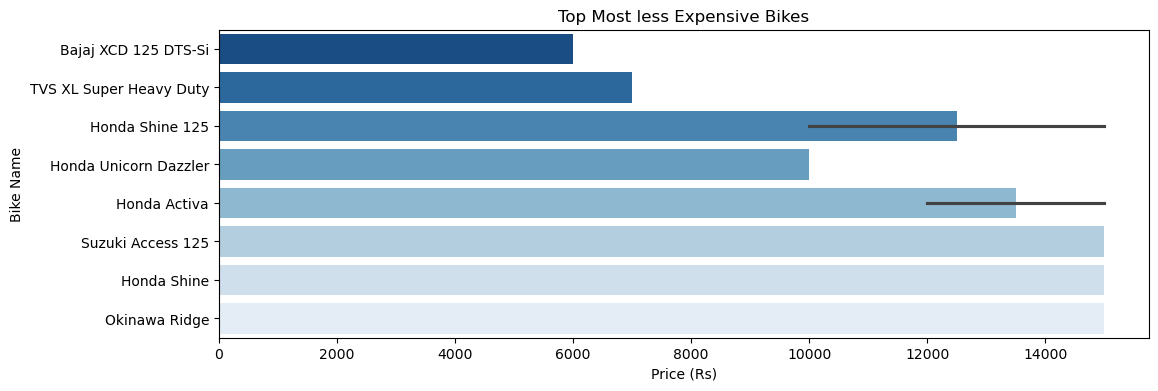

In [43]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_10_bikes, x="Price (Rs)", y="Bike Model", hue = 'Bike Model', palette="Blues_r")
plt.xlabel("Price (Rs)")
plt.ylabel("Bike Name")
plt.title("Top Most less Expensive Bikes")
plt.savefig("Top_10_Most_Less_Expensive_Bikes.png", dpi=300, bbox_inches="tight")
plt.show()

## Observation:-
- Bajaj XCD 125 DTS-Si is the cheapest in the list.
- Prices depend on condition & demand.
- Budget-friendly bikes = high resale turnover.

##  Which city has the minimum bike price for sell?

In [44]:
city_mean = df.groupby('City')['Price (Rs)'].min().sort_values(ascending=True).head(10)

In [45]:
#city_mean

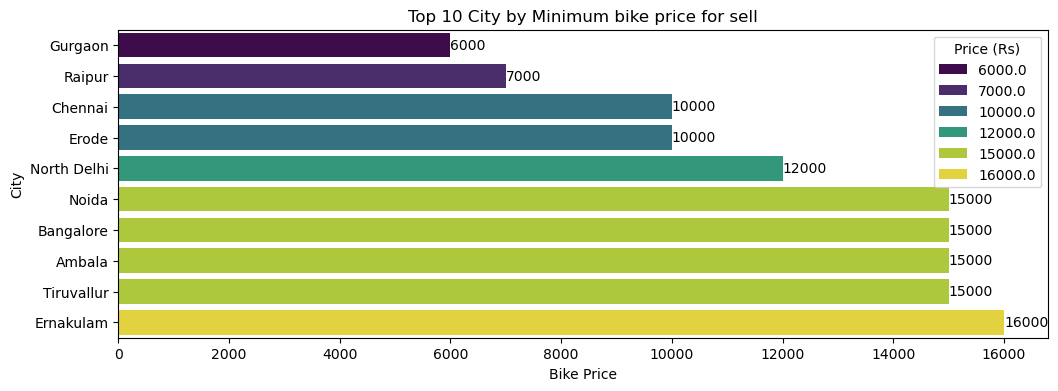

In [46]:
plt.figure(figsize = (12,4))
ax = sns.barplot(y = city_mean.index, x = city_mean.values, hue = city_mean, palette='viridis')

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("City")
plt.xlabel("Bike Price")
plt.title("Top 10 City by Minimum bike price for sell")
plt.savefig("Top 10 City by minimum bike price for sell.png", dpi=300, bbox_inches="tight")
plt.show()

### Observation:-
- The lowest minimum price is found in Gurgaon (₹6,000).
- Cities like Noida, Bangalore, Ambala, and Tiruvallur have similar minimum prices at ₹15,000, indicating a higher price floor in those markets.

##  Which city has the highest bike price for sell?

In [ ]:
city = df.groupby('City')['Price (Rs)'].max().sort_values(ascending=False).head(10)

In [ ]:
plt.figure(figsize = (12,4))
ax = sns.barplot(y = city.index, x = city.values, hue = city, palette='viridis')

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("City")
plt.xlabel("Bike Price")
plt.title("Top 10 City by Maximum bike price for sell")
plt.savefig("Top 10 City by Maximum bike price for sell.png", dpi=300, bbox_inches="tight")
plt.show()

### Observation:- 
- In City Banglore, in a state of Karnataka has the highest bike price around 8,80,000.
- Metro cities like Pune and Chennai also show high average prices, indicating strong demand for second-hand bikes in these areas.

# Multivariate Analysis:- 
- Multivariate analysis means studying more than two variables or columns at the same time, to understand patterns, relationships, or hidden insights among them.

## Heatmap of correlation (Year vs Price)

In [322]:
corr = df[['Model Year', 'Price (Rs)']].corr()
corr

,Model Year,Price (Rs)
Model Year,1.000000,0.459528
Price (Rs),0.459528,1.000000


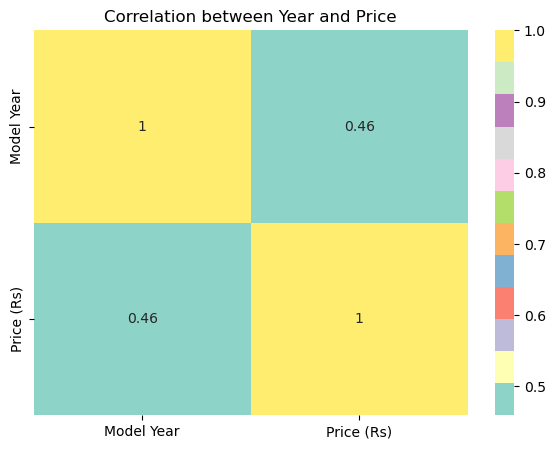

In [348]:

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="Set3")
plt.title("Correlation between Year and Price")
plt.savefig("Correlation between Year and Price.png")
plt.show()


### Observation:-
- There is a moderate positive correlation (0.46) between year and price.
- This means newer bikes generally sell for higher prices in the second-hand market.

## In the dataset, how does finance availability (Yes/No) affect the distribution of bike prices?

<Figure size 1200x400 with 0 Axes>

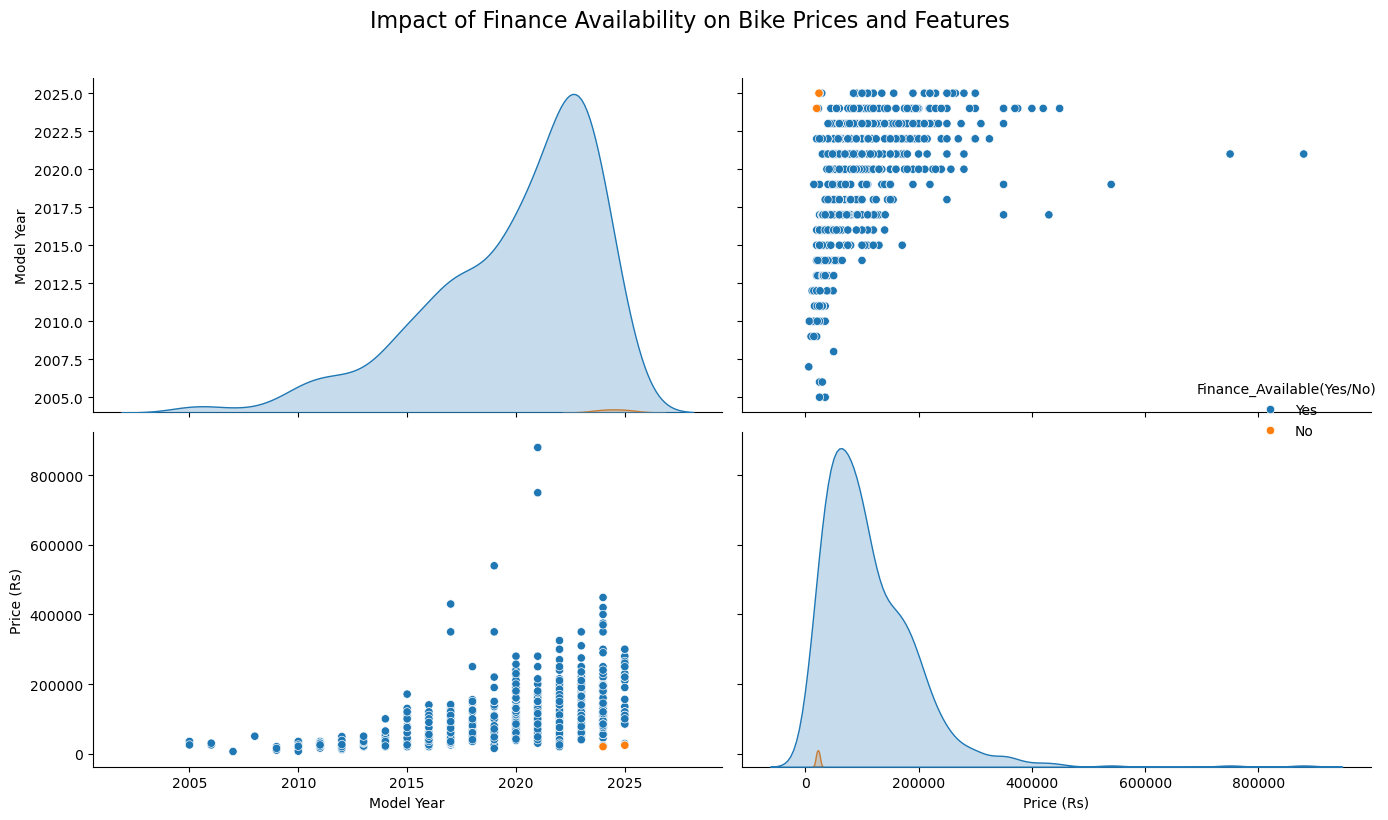

In [31]:
plt.figure(figsize = (12,4))
sns.pairplot(df, hue='Finance_Available(Yes/No)', diag_kind='kde', height=4,aspect=1.5) 
plt.suptitle("Impact of Finance Availability on Bike Prices and Features", y=1.02, fontsize=16)
plt.savefig("Impact of Finance Availability on Bike Prices and Features.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Observstoion:-
- Most bikes are from 2015 onwards, peaking around 2020–2023.
- Majority of bikes are priced below ₹2 lakhs.
- Newer bikes have higher prices compared to older ones.
- Finance is mostly available (“Yes”) across bikes